In [1]:
%pylab inline
import prettysounds
from midi2audio import FluidSynth

/Users/Torben/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [29]:
image_file = '/Users/Torben/Code/prettysounds/dickbutt.jpg'
output_file = '/Users/Torben/Code/prettysounds/dickbutt.mid'

reshaping image to 50x125
writing midi file


True

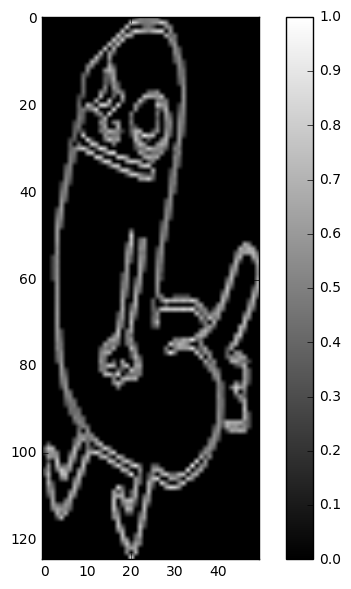

In [30]:
image_mat = prettysounds.preprocess_image(image_file,reshape_params=[50,125])
fig = prettysounds.plot_grayscale_img(image_mat)
prettysounds.matrix_to_midi(image_mat, first_note=0, tempo=250, output_file=output_file)

/Users/Torben/anaconda2/lib/python2.7/site-packages/midiutil/MidiFile.py:899: FutureWarning: Please explicitly set adjust_origin. Default behaviour will change in a future version.
  FutureWarning)


True

In [3]:
from midiutil.MidiFile import MIDIFile
import numpy as np
input_mat = np.load('/Users/Torben/Code/prettysounds/input_data.npz')


def matrix_to_midi(input_mat, first_note, tempo):
    # input_mat = input matrix (numpy), first_note = first note of y-axis in midi note number
    num_times = np.shape(input_mat)[1]
    track = 0
    channel = 0
    time = 0 # Time it starts
    duration = 1 # Duration of each beat
    MyMIDI = MIDIFile(1) # One track
    MyMIDI.addTempo(track, time, tempo)
    for times in range(num_times):
        freq=np.nonzero(input_mat[:,times])[0]+first_note
        volume=np.squeeze(np.matrix((input_mat[np.nonzero(input_mat[:,times]),times])))*100   
        
        if len(freq)>0:
            for jj in range(len(freq)):
                MyMIDI.addNote(track, channel, freq[jj], times, duration, volume[0,jj].astype(np.int64))
            
    binfile = open("output.mid", 'wb')
    MyMIDI.writeFile(binfile)
    binfile.close()
    
with np.load('input_data.npz') as data:
    input_mat = data['input_mat']
    first_note = data['first_note']
    tempo = data['tempo']
    
matrix_to_midi(input_mat, first_note,tempo)

matrix_to_midi(input_mat, first_note=50,tempo=120)

In [10]:
my_midi_file = '/Users/Torben/Code/prettysounds/bach_demo.mid'
my_wav_file = '/Users/Torben/Code/prettysounds/jack.wav'
fs = FluidSynth()
fs.midi_to_audio(my_midi_file,my_wav_file)

OSError: [Errno 2] No such file or directory

In [15]:
FluidSynth.play_midi??

In [ ]:
FluidSynth().play_midi